# Loading the Libraries and Data

In [65]:
import pandas as pd


# Load Dataset

In [97]:
url = 'https://raw.githubusercontent.com/divaamahajan/K-Most-Popular-Words/main/logs/logs.csv'
df = pd.read_csv(url)
df.head()

,Top k,Data Structure,File division,Algorithm Approach,Filename,File Size (GB),Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
0,10,counter,chunks,multithread,small_50MB_dataset.txt,0.04,5.00,4.38,121.88,1.2
1,10,counter,chunks,multithread,small_50MB_dataset.txt,0.04,10.00,4.69,188.07,3.6
2,10,counter,chunks,multithread,small_50MB_dataset.txt,0.04,20.00,4.52,225.91,1.3
3,10,counter,chunks,multithread,small_50MB_dataset.txt,0.04,40.00,4.53,234.38,1.1
4,10,counter,chunks,singlethread,small_50MB_dataset.txt,0.04,5.73,4.07,54.63,1.3


# Data Preprocessing

In [98]:
import numpy as np

# Replace "chunks heapq" with "chunks" in the File division column
df.loc[df['File division'] == 'chunks heapq', 'File division'] = 'chunks'

# Concatenate "heapq" to the current value of Data Structure column
df.loc[df['File division'] == 'chunks', 'Data Structure'] += ' heapq'

# check if Algorithm Approach column = 'chunks heapq'
mask = df['Algorithm Approach'] == 'chunks heapq'

# update the Data Structure column for matching rows
df.loc[mask, 'Data Structure'] = df.loc[mask, 'Data Structure'].astype(str) + ' heapq'

# replace 'chunks heapq' with 'singlethread' in the Algorithm Approach column
df.loc[mask, 'Algorithm Approach'] = 'singlethread'



In [80]:
df.describe()

,Top k,File Size (GB),Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
count,81.000000,81.000000,76.000000,81.000000,81.000000,81.000000
mean,6.296296,2.616543,45.362632,42.191605,677.363704,5.223457
std,2.204793,4.764745,117.626162,77.801692,626.406075,9.436091
min,5.000000,0.040000,2.290000,0.010000,15.020000,0.000000
25%,5.000000,0.040000,5.730000,1.970000,137.950000,1.700000
50%,5.000000,0.290000,20.000000,9.250000,542.480000,2.500000
75%,10.000000,2.310000,40.000000,80.580000,991.030000,4.200000
max,10.000000,14.340000,734.090000,510.100000,2497.410000,66.700000


In [99]:
# drop 'Top k' and 'Filename' columns
df = df.drop(columns=['Top k', 'Filename'])

In [100]:

# create dictionaries to map numeric codes to text values
data_structure_dict = {code: value for code, value in enumerate(df['Data Structure'].astype('category').cat.categories)}
file_division_dict = {code: value for code, value in enumerate(df['File division'].astype('category').cat.categories)}
algorithm_approach_dict = {code: value for code, value in enumerate(df['Algorithm Approach'].astype('category').cat.categories)}# convert 'Data Structure', 'File division', and 'Algorithm Approach' to numeric values

df['Data Structure'] = df['Data Structure'].astype('category').cat.codes
df['File division'] = df['File division'].astype('category').cat.codes
df['Algorithm Approach'] = df['Algorithm Approach'].astype('category').cat.codes

df_data_structure = pd.DataFrame.from_dict(data_structure_dict, orient='index', columns=['Data Structure'])
df_file_division = pd.DataFrame.from_dict(file_division_dict, orient='index', columns=['File Division'])
df_algorithm_approach = pd.DataFrame.from_dict(algorithm_approach_dict, orient='index', columns=['Algorithm Approach'])



In [101]:

# identify rows where chunk size is 0
mask = df['Chunk Size (MB)'] == 0

# convert file size to MB for matching rows
converted_values = df.loc[mask, 'File Size (GB)'] * 1024

# update the DataFrame
df.loc[mask, 'Chunk Size (MB)'] = converted_values.round(2)

df.head()

,Data Structure,File division,Algorithm Approach,File Size (GB),Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
0,1,0,2,0.04,5.00,4.38,121.88,1.2
1,1,0,2,0.04,10.00,4.69,188.07,3.6
2,1,0,2,0.04,20.00,4.52,225.91,1.3
3,1,0,2,0.04,40.00,4.53,234.38,1.1
4,1,0,3,0.04,5.73,4.07,54.63,1.3


# Correltion Analysis

In [102]:
# Compute the correlation matrix
corr_matrix = df.corr()
corr_matrix

,Data Structure,File division,Algorithm Approach,File Size (GB),Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
Data Structure,1.000000,0.347071,-0.183094,0.347481,0.119918,0.239420,0.123567,-0.092579
File division,0.347071,1.000000,0.079748,0.042654,NaN,0.263363,-0.216691,-0.043310
Algorithm Approach,-0.183094,0.079748,1.000000,0.029428,0.037752,0.153175,0.038541,-0.090150
File Size (GB),0.347481,0.042654,0.029428,1.000000,0.391642,0.757866,0.244556,-0.046831
Chunk Size (MB),0.119918,NaN,0.037752,0.391642,1.000000,0.533257,-0.039114,-0.040453
Running time (seconds),0.239420,0.263363,0.153175,0.757866,0.533257,1.000000,0.237608,-0.082780
Memory usage (MB),0.123567,-0.216691,0.038541,0.244556,-0.039114,0.237608,1.000000,-0.189610
CPU utilization %,-0.092579,-0.043310,-0.090150,-0.046831,-0.040453,-0.082780,-0.189610,1.000000


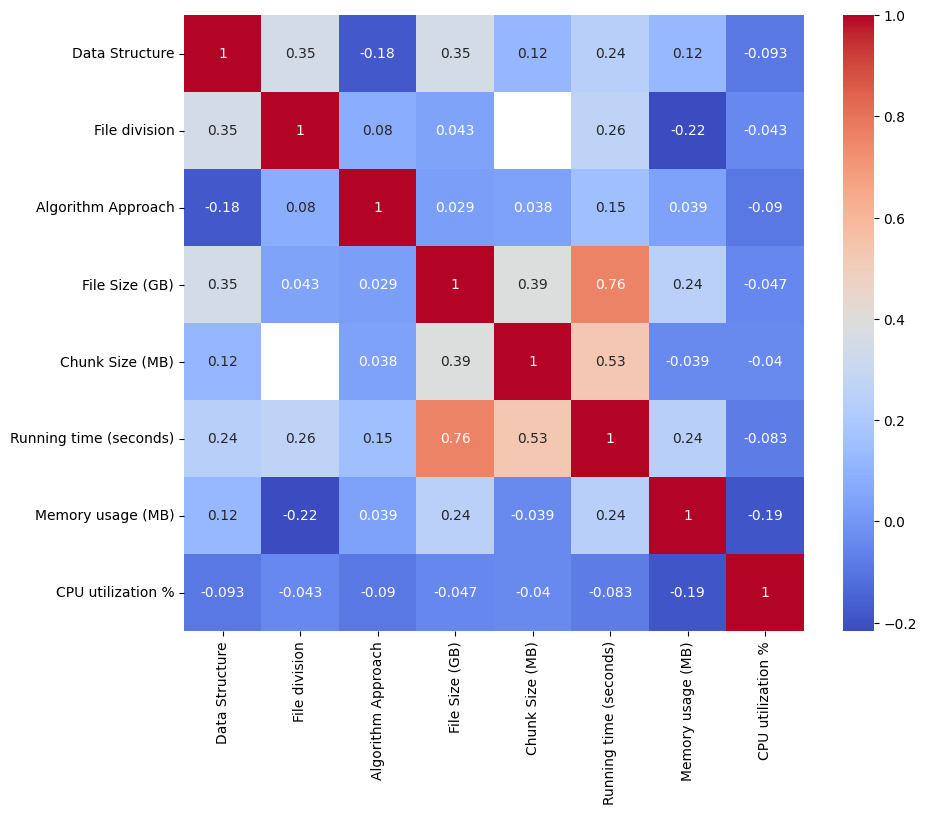

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


* File Size (GB) and Running time (seconds) have a strong positive correlation of 0.76, meaning that as the file size increases, the running time tends to increase as well.
* Memory usage (MB) and CPU utilization % have a strong negative correlation of -0.19, meaning that as memory usage increases, CPU utilization tends to decrease.
* We can see that Memory usage (MB) has a weak positive correlation with File Size (GB) and Running time (seconds), which suggests that as the file size or running time increases, the memory usage may also increase slightly.
* Similarly, CPU utilization % has a weak negative correlation with Algorithm Approach, suggesting that more complex algorithms may result in lower CPU utilization.

# Data Visualization

In [104]:
df_data_structure

,Data Structure
0,counter
1,counter heapq
2,defaultdict heapq
3,hashmap


In [105]:
df_file_division

,File Division
0,chunks
1,file


In [106]:
df_algorithm_approach

,Algorithm Approach
0,heapq
1,multiprocess
2,multithread
3,singlethread


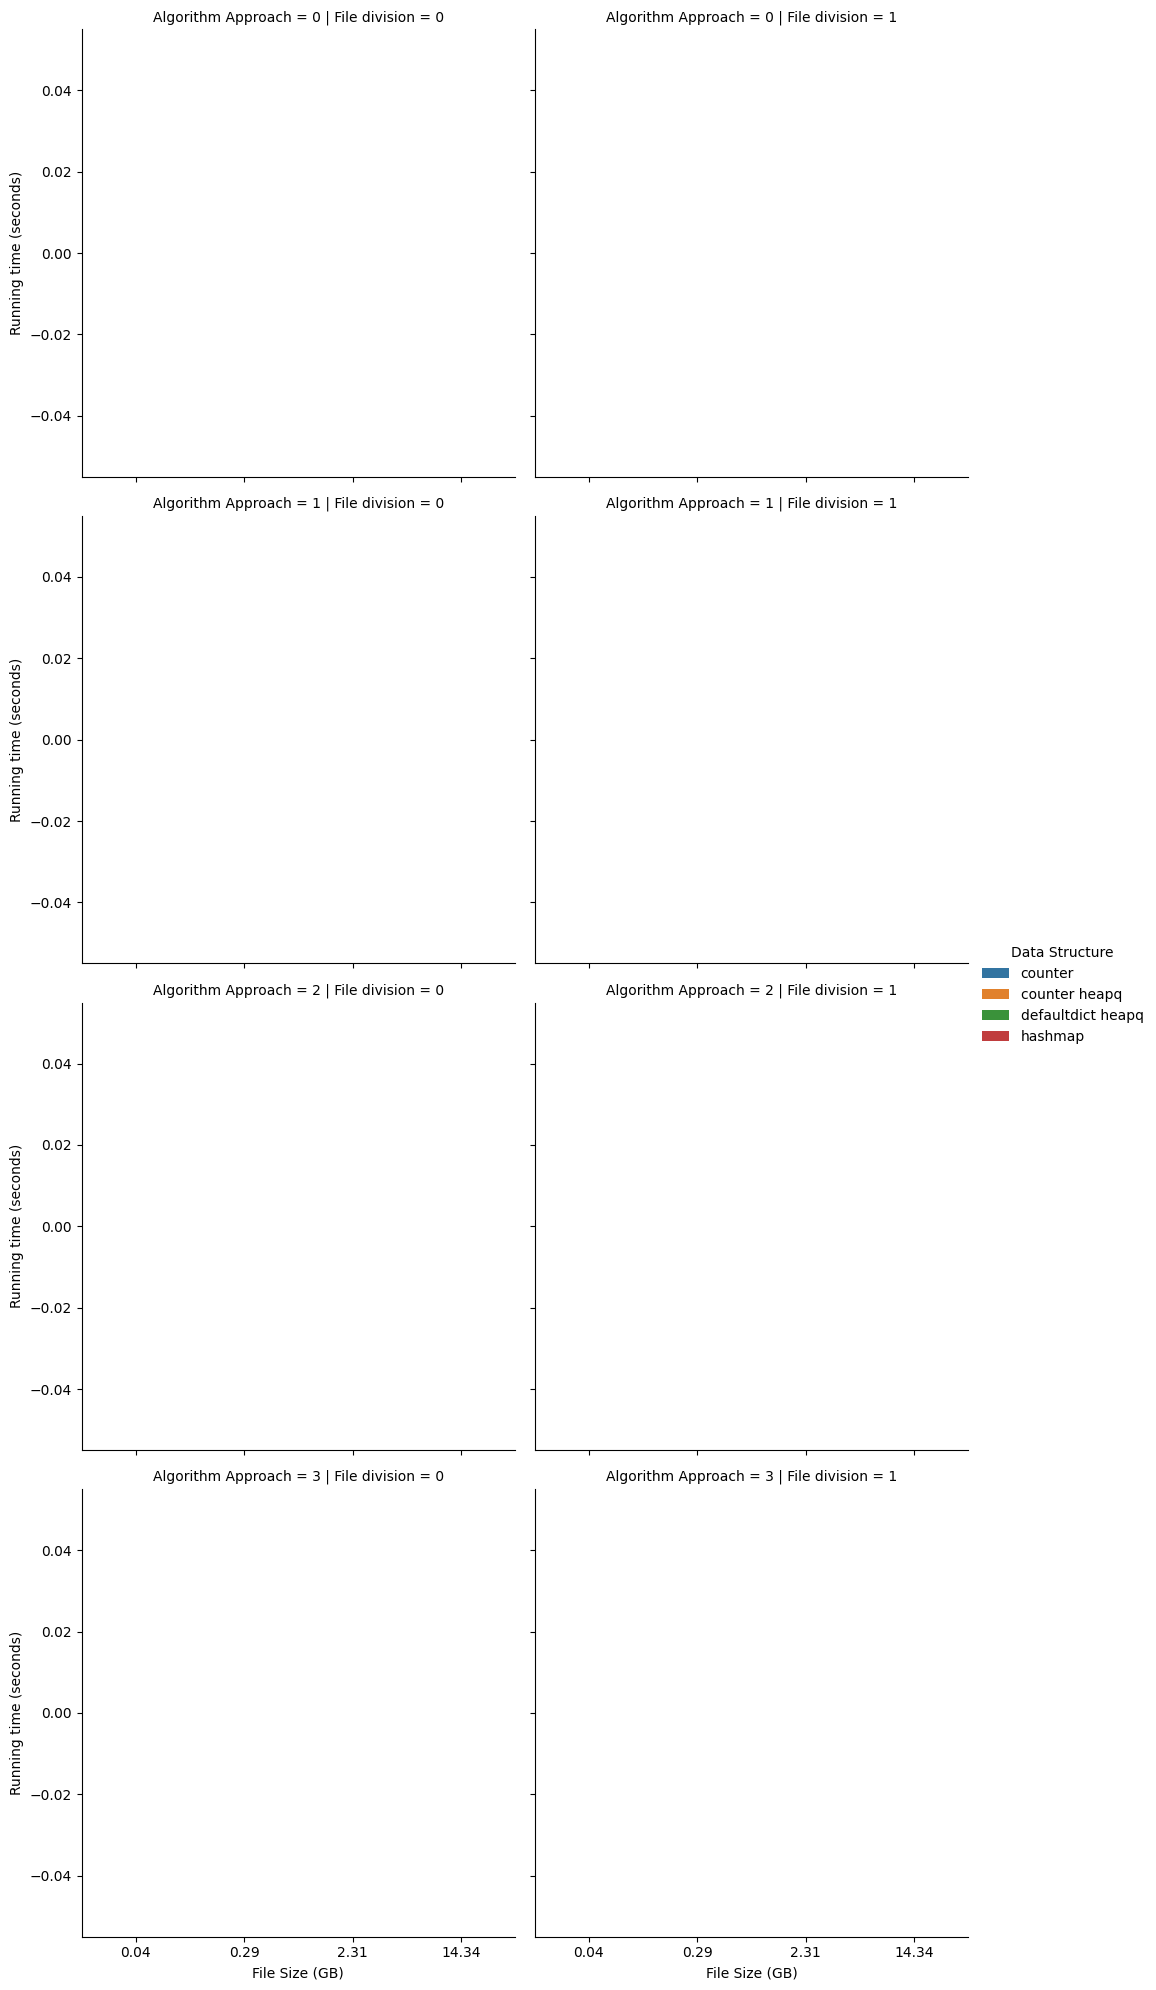

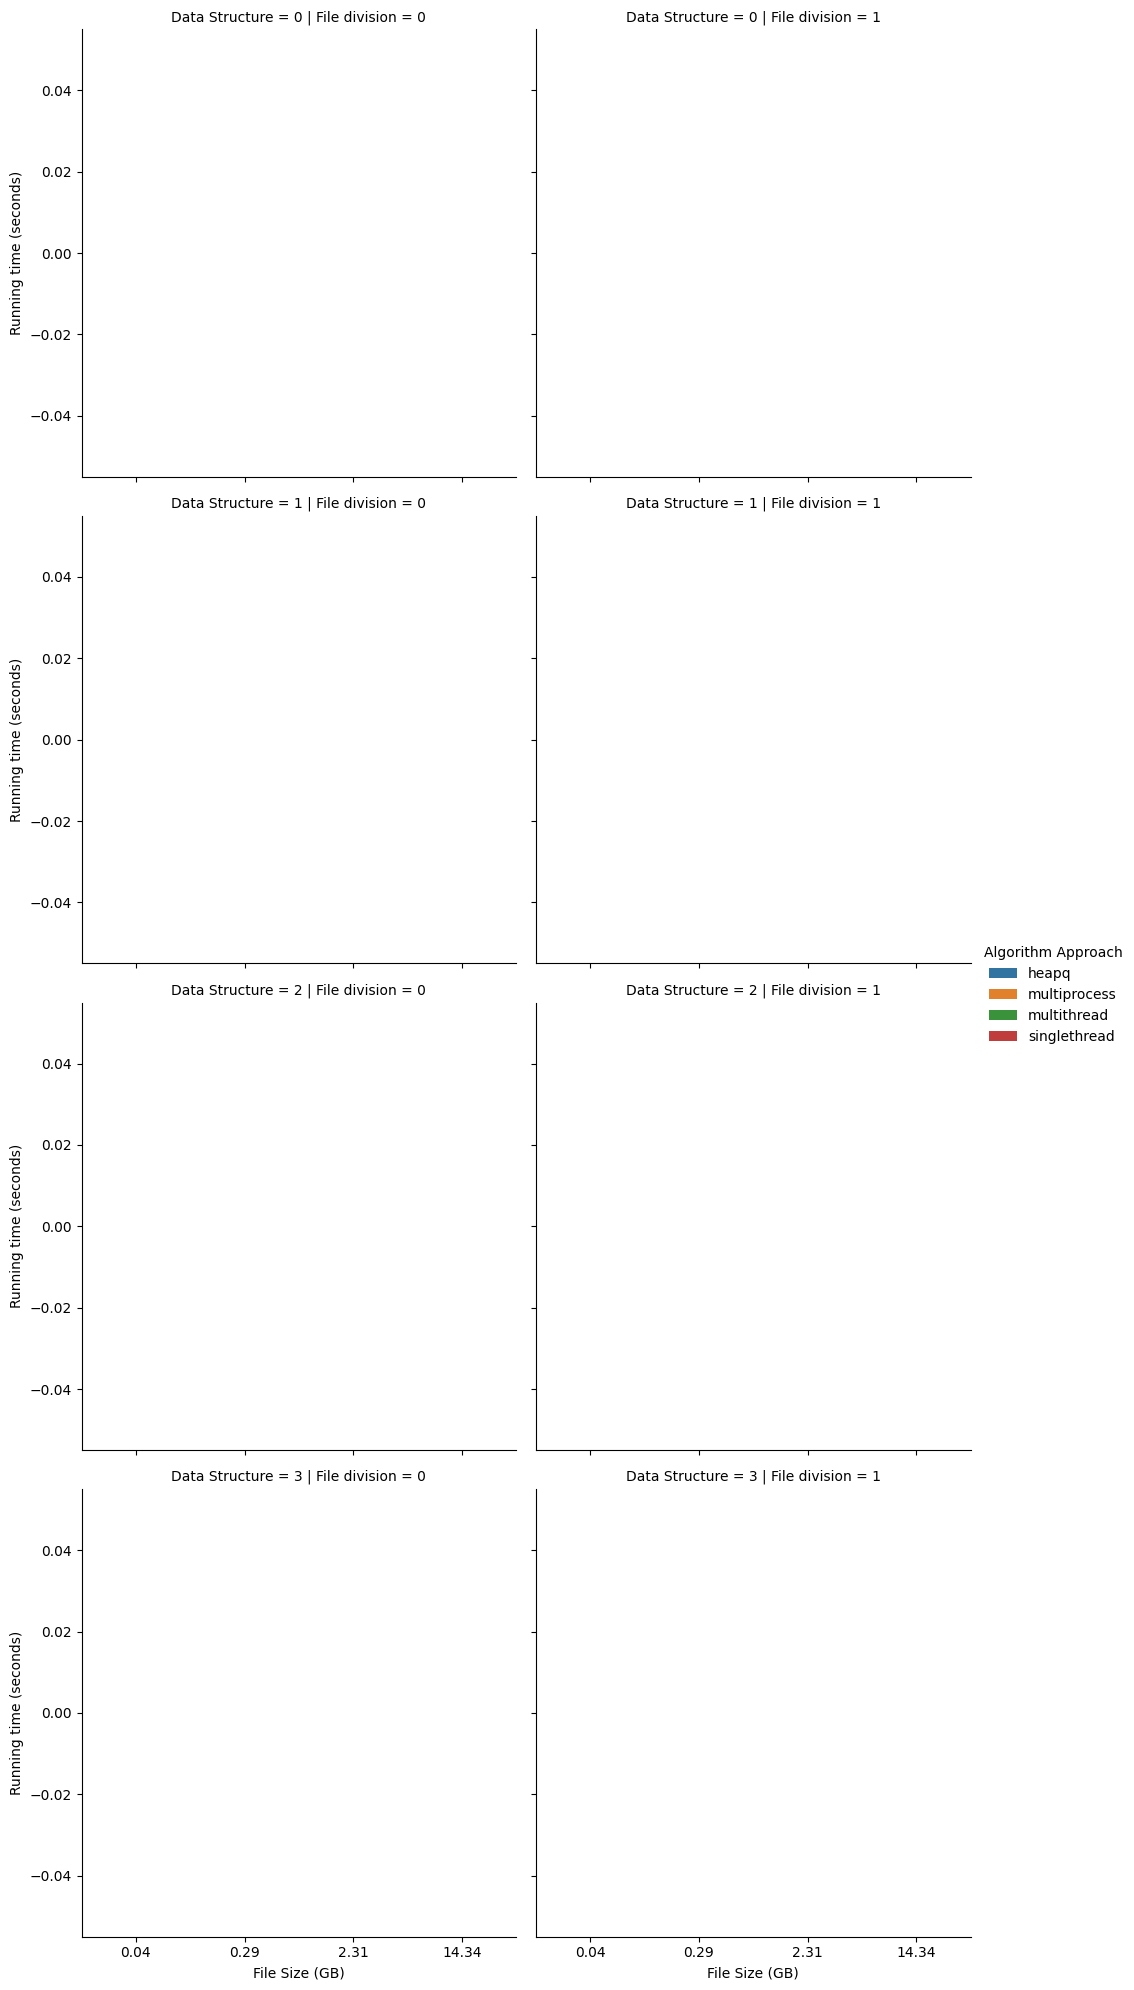

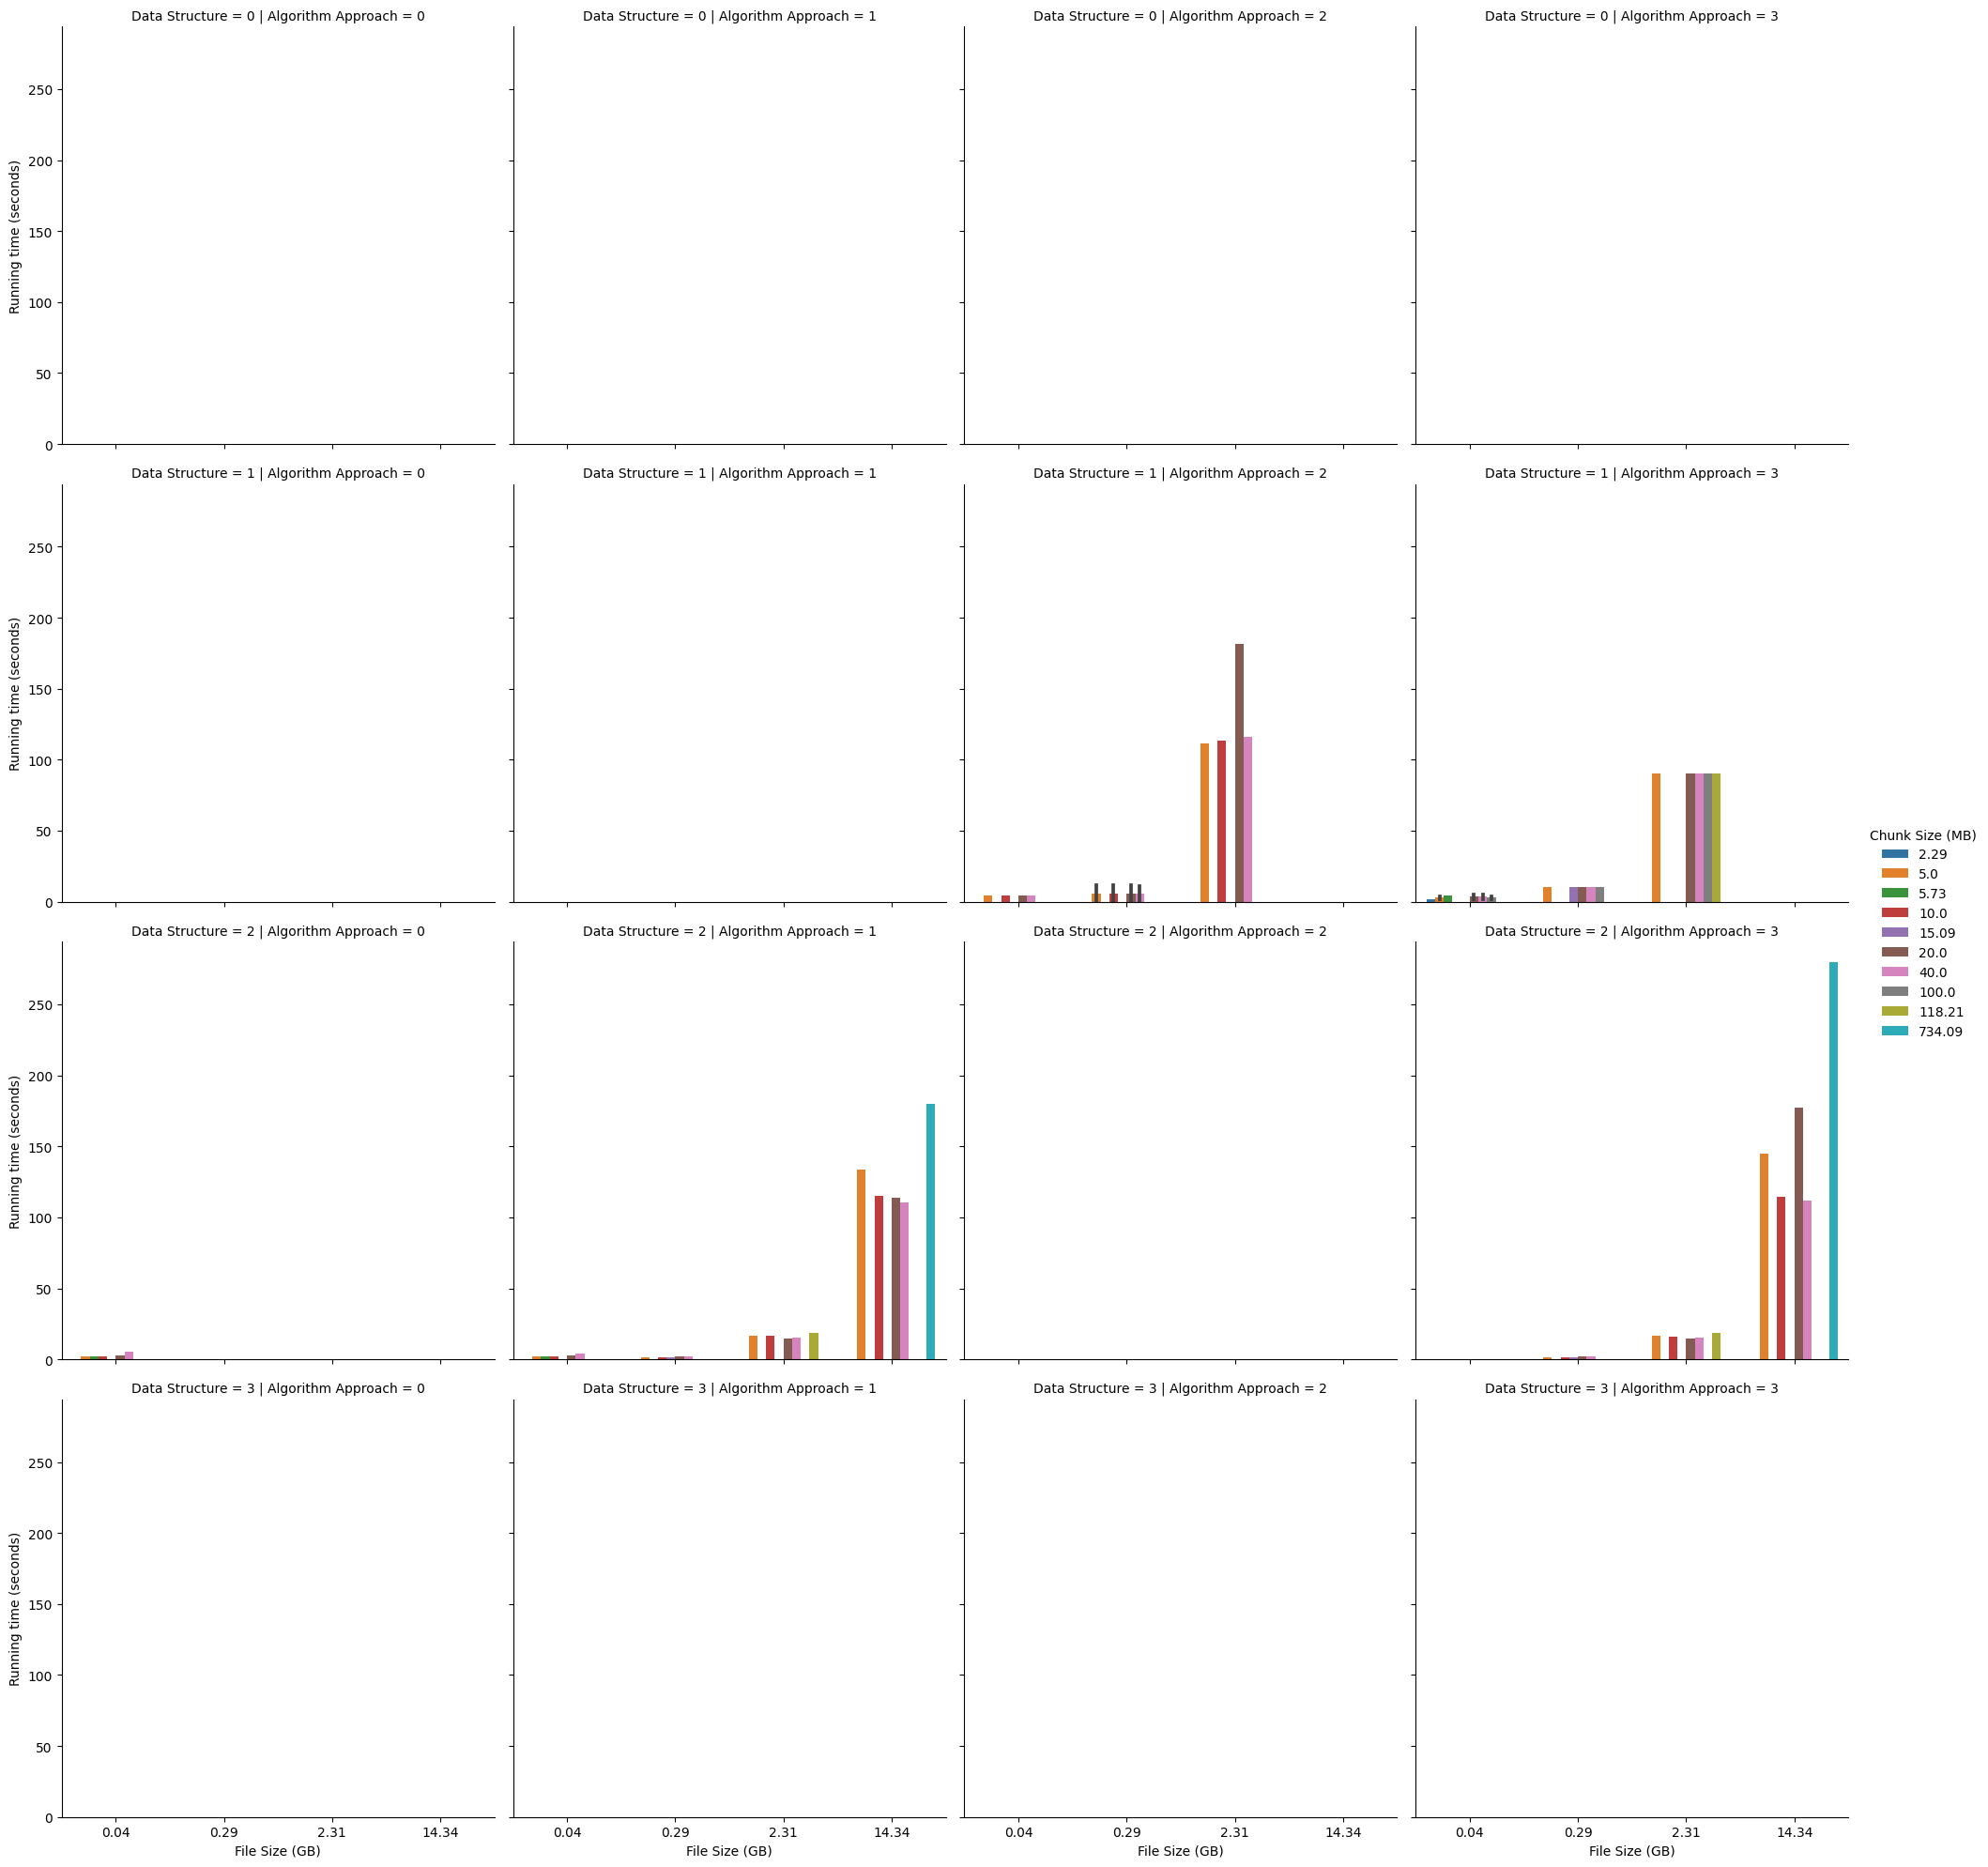

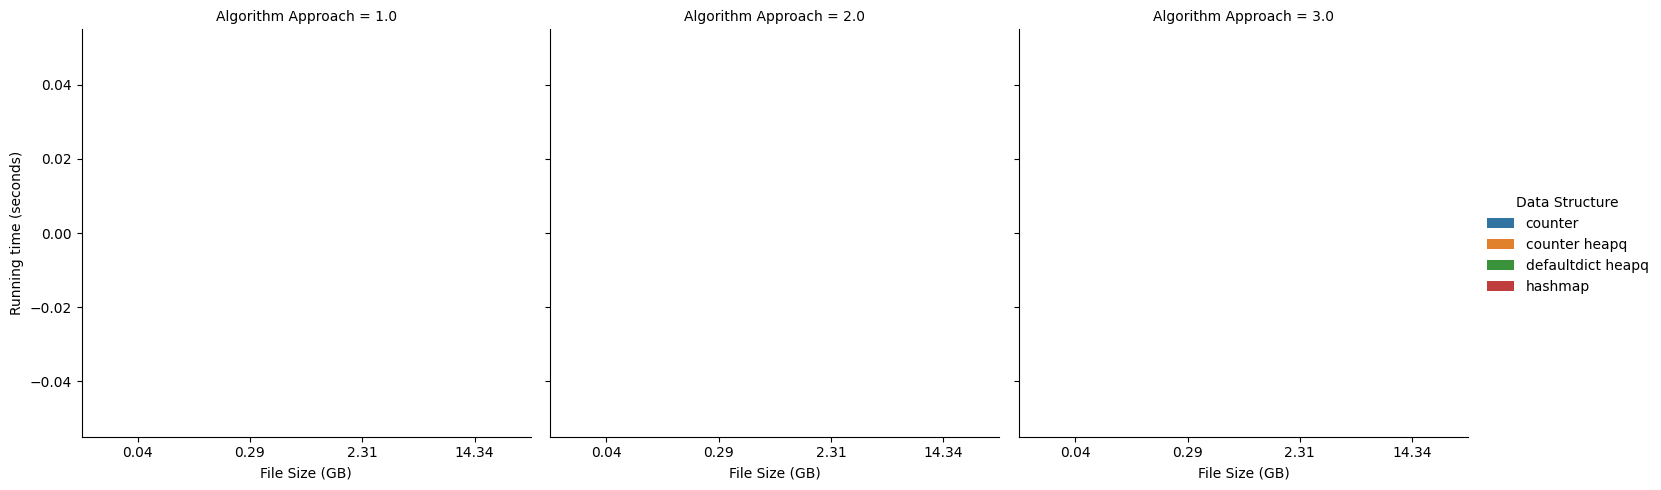

In [107]:
# 1. plot the performance of each data structure for different file sizes
sns.catplot(x="File Size (GB)", y="Running time (seconds)", hue="Data Structure",
            col="File division", row="Algorithm Approach", data=df, kind="bar",
            hue_order=data_structure_dict.values())  # Use the values of data_structure_dict as hue order

# 2. plot the performance of each algorithm approach for different file sizes
sns.catplot(x="File Size (GB)", y="Running time (seconds)", hue="Algorithm Approach",
            col="File division", row="Data Structure", data=df, kind="bar",
            hue_order=algorithm_approach_dict.values())  # Use the values of algorithm_approach_dict as hue order

# 3. plot the performance of each chunk size for different file sizes
sns.catplot(x="File Size (GB)", y="Running time (seconds)", hue="Chunk Size (MB)",
            col="Algorithm Approach", row="Data Structure", data=df, kind="bar")

# 4. plot the best performing combination of data structure and algorithm approach for each file size
best_performing = df.groupby(['File Size (GB)']).apply(lambda x: x.loc[x['Running time (seconds)'].idxmin()])
sns.catplot(x="File Size (GB)", y="Running time (seconds)", hue="Data Structure",
            col="Algorithm Approach", data=best_performing, kind="bar",
            hue_order=data_structure_dict.values())  # Use the values of data_structure_dict as hue order

# # Update the titles of the plots to show categorical values instead of numeric values
# for p in plt.gcf().axes:
#     title = p.get_title()
#     data_structure, file_division, algorithm_approach = map(int, title.split('|'))
#     title = f"Algorithm Approach = {algorithm_approach_dict[algorithm_approach]} | " \
#             f"File division = {file_division_dict[file_division]} | " \
#             f"Data Structure = {data_structure_dict[data_structure]}"
#     p.set_title(title)

plt.show()


KeyError: 'x'

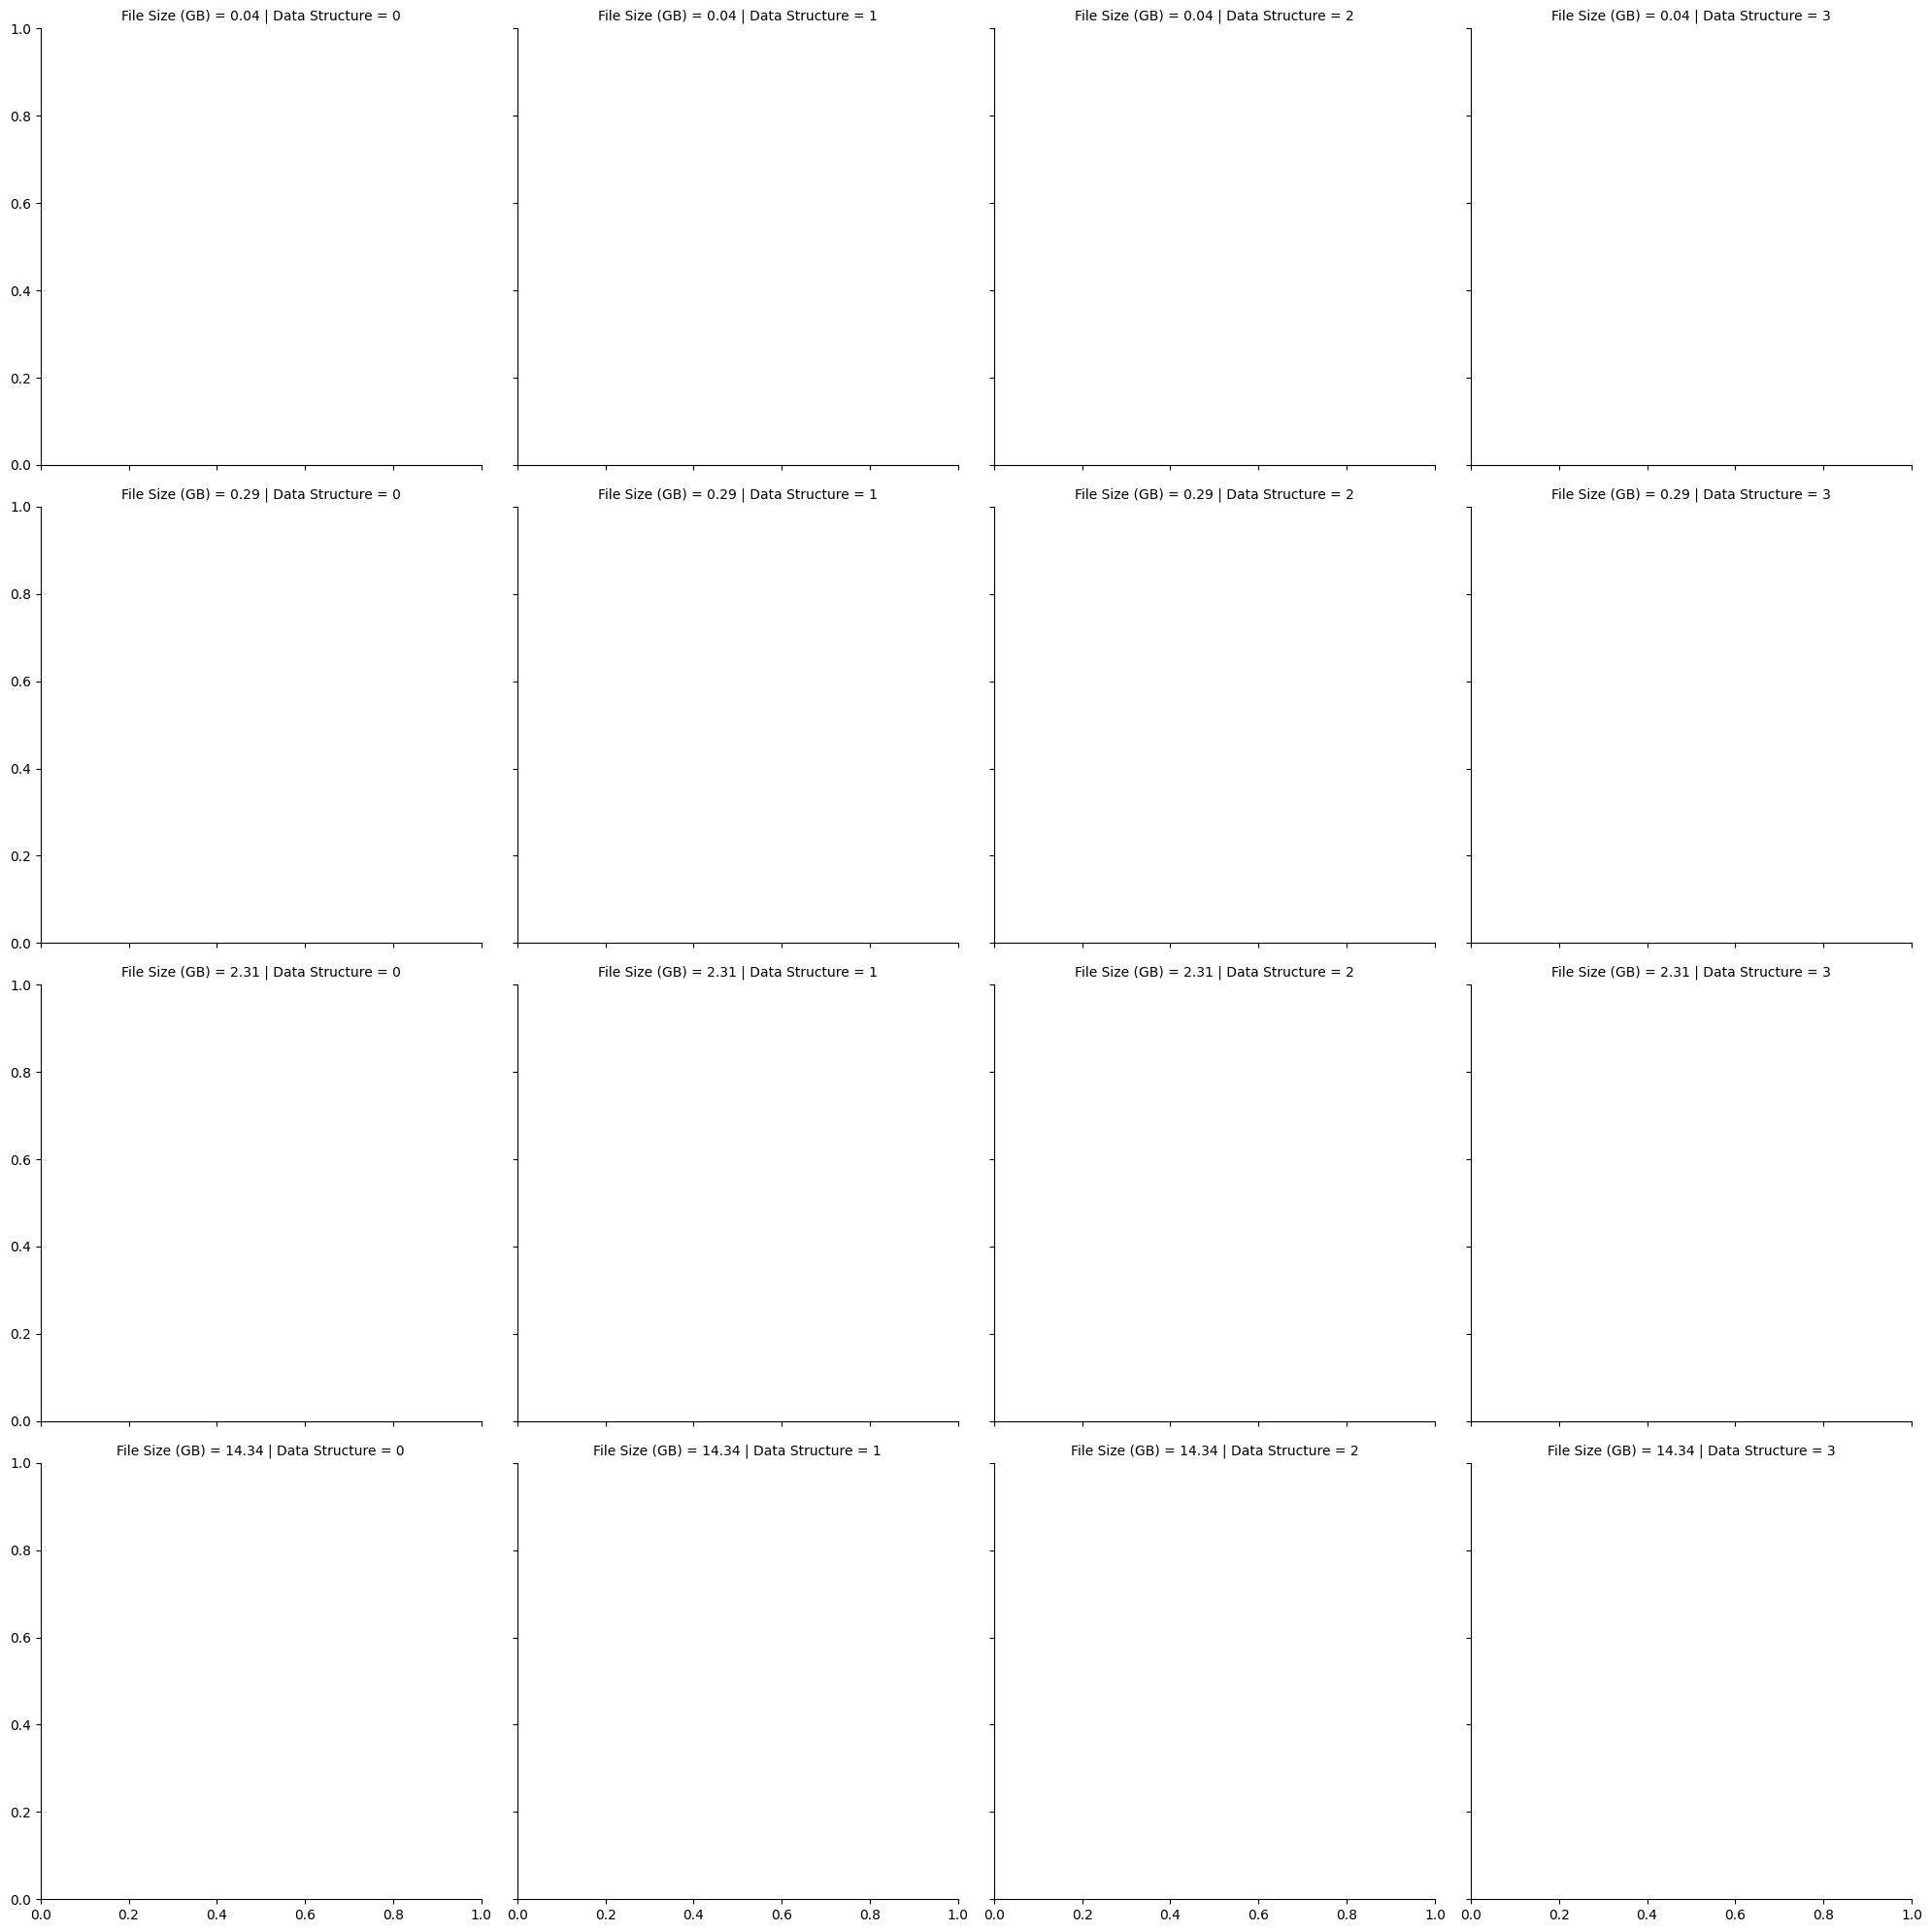

In [108]:
# 5. plot how Running time, Memory usage and CPU utilization change with Algorithm Approach, Data Structure, and Chunk Size
sns.relplot(x="Chunk Size (MB)", y="Running time (seconds)", hue="Algorithm Approach",
            col="Data Structure", row="File Size (GB)", data=df, kind="line")
sns.relplot(x="Chunk Size (MB)", y="Memory usage (MB)", hue="Algorithm Approach",
            col="Data Structure", row="File Size (GB)", data=df, kind="line")
sns.relplot(x="Chunk Size (MB)", y="CPU utilization %", hue="Algorithm Approach",
            col="Data Structure", row="File Size (GB)", data=df, kind="line")

# # Update the titles of the plots to show categorical values instead of numeric values
# for p in plt.gcf().axes:
#     title = p.get_title()
#     data_structure, file_division, algorithm_approach = map(int, title.split('|'))
#     title = f"Algorithm Approach = {algorithm_approach_dict[algorithm_approach]} | " \
#             f"File division = {file_division_dict[file_division]} | " \
#             f"Data Structure = {data_structure_dict[data_structure]}"
#     p.set_title(title)


plt.show()

# Top 5 words

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# define data
data = {

    '50 MB dataset': {
        'us': 23246,
        'would': 22614,
        'countries': 21079,
        'world': 20052,
        'one': 17000
    },
    '16 GB dataset': {
        'said': 16983047,
        'would': 5829171,
        'one': 5827883,
        'new': 5619285,
        'also': 4618289
    },
    '300 MB dataset': {
        'european': 318829,
        'mr': 210735,
        'would': 181957,
        'also': 180186,
        'commission': 172844
    },
    '2.5 GB dataset': {
        'said': 2616266,
        'one': 949555,
        'would': 917212,
        'new': 852822,
        'also': 727934
    }
}

# plot word clouds and print counts
for filename, word_counts in data.items():
    print(f'Top 5 words in {filename}:')
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Top 5 words in {filename}')
    plt.axis('off')
    plt.tight_layout(pad=0)
    # add legend
    items = list(word_counts.items())
    legend = "\n".join([f"{item[0]}:{item[1]}" for item in items])
    plt.text(1.1, 0.5, legend, transform=plt.gca().transAxes, ha="left", va="center")
    
plt.show()


ModuleNotFoundError: No module named 'wordcloud'